#구글 드라이브 마운트 및 라이브러리 설치(import)

In [1]:
from google.colab import drive
drive.mount('/content/drive')
# 현재 디렉토리 설정
%cd /content/drive/My Drive/seoultech_ML

Mounted at /content/drive
/content/drive/My Drive/seoultech_ML


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score, confusion_matrix
from joblib import dump
from joblib import load
from itertools import combinations

In [3]:
!pip install seaborn
!pip install scikit-learn

# 데이터 분석

In [4]:
# CSV 파일 로드
file_path = 'Training.csv'
data = pd.read_csv(file_path)

# 데이터의 처음 몇 줄을 출력하여 구조 파악
data.head()

,TARGET WINE CLASS,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines
0,1,NaN,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58
3,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55
4,1,14.38,1.87,2.38,12.0,102,3.30,3.64,0.29,2.96,7.50,1.20,3.00


In [ ]:
# 결측치 확인
print(data.isnull().sum())

TARGET WINE CLASS               0
Alcohol                         1
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
dtype: int64


In [ ]:
# 'Alcohol' 열에서 결측치가 있는 행을 출력
missing_alcohol_rows = data[data['Alcohol'].isnull()]
missing_alcohol_rows

,TARGET WINE CLASS,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines
0,1,NaN,1.71,2.43,15.6,127,2.8,3.06,0.28,2.29,5.64,1.04,3.92


In [ ]:
# 와인 클래스가 1이고 Alcohol 값의 평균으로 결측치 대체 후 확인
alcohol_mean_class_1 = data[data['TARGET WINE CLASS'] == 1]['Alcohol'].mean()

data.loc[data['Alcohol'].isnull() & (data['TARGET WINE CLASS'] == 1), 'Alcohol'] = alcohol_mean_class_1

print(data[data['TARGET WINE CLASS'] == 1]['Alcohol'].isnull().sum())

0


In [ ]:
# 데이터의 타입 확인
print(data.dtypes)

TARGET WINE CLASS                 int64
Alcohol                         float64
Malic acid                      float64
Ash                             float64
Alcalinity of ash               float64
Magnesium                         int64
Total phenols                   float64
Flavanoids                      float64
Nonflavanoid phenols            float64
Proanthocyanins                 float64
Color intensity                 float64
Hue                             float64
OD280/OD315 of diluted wines    float64
dtype: object


In [ ]:
# 데이터프레임의 열 이름 출력
print(data.columns)


Index(['TARGET WINE CLASS', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash  ', 'Magnesium', 'Total phenols', 'Flavanoids',
       'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines'],
      dtype='object')


In [ ]:
# 학습 데이터 갯수 확인
len(data)

93

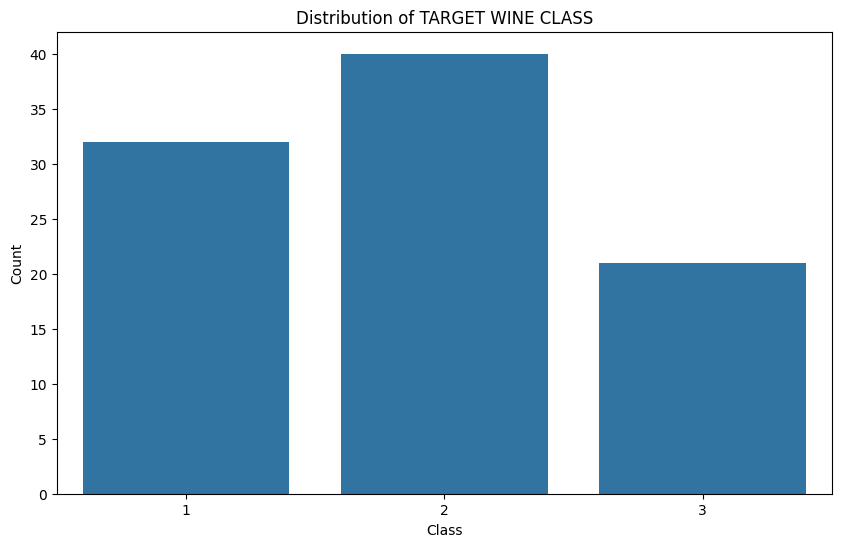

In [ ]:
# 타겟 데이터 'TARGET WINE CLASS' 클래스 균형 확인

plt.figure(figsize=(10, 6))
sns.countplot(x='TARGET WINE CLASS', data=data)
plt.title('Distribution of TARGET WINE CLASS')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## 알코올 함량(Alcohol)과 와인 클래스(TARGET WINE CLASS)의 관계 확인 및 이상치 제거

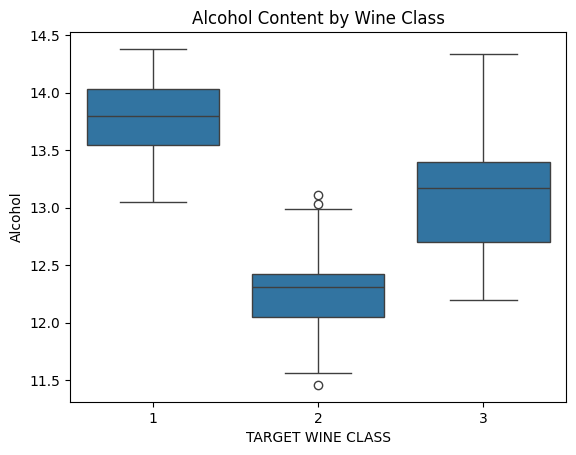

In [ ]:
# 알코올 함량과 와인 클래스의 관계
sns.boxplot(x='TARGET WINE CLASS', y='Alcohol', data=data)
plt.title('Alcohol Content by Wine Class')
plt.show()

In [ ]:
# 이상치를 제거하기 전의 데이터 행 수 확인
print("Original Data Rows:", len(data))

# 'Alcohol'의 이상치 범위와 대상 클래스를 설정
alcohol_lower_bound = 13.3
alcohol_upper_bound = 14.0
target_class = 2  # 대상 클래스 번호 설정

# 해당 클래스의 'Alcohol' 이상치 범위 안에 있는 행만 삭제
data = data[~((data['TARGET WINE CLASS'] == target_class) & (data['Alcohol'] >= alcohol_lower_bound) & (data['Alcohol'] <= alcohol_upper_bound))]

# 이상치를 제거한 후의 데이터 행 수 확인
print("Filtered Data Rows:", len(data))


Original Data Rows: 93
Filtered Data Rows: 91


## 페놀 화합물의 총량(Total phenols)과 와인 클래스(TARGET WINE CLASS)의 관계 확인 및 이상치 제거

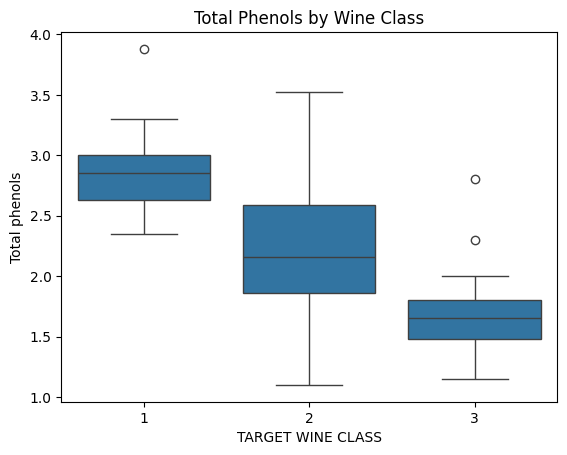

In [ ]:
#  페놀 화합물의 총량과 와인 클래스의 관계
sns.boxplot(x='TARGET WINE CLASS', y='Total phenols', data=data)
plt.title('Total Phenols by Wine Class')
plt.show()

In [ ]:
# 이상치를 제거하기 전의 데이터 행 수 확인
print("Original Data Rows:", len(data))

# 'Alcohol'의 이상치 범위와 대상 클래스를 설정
alcohol_lower_bound = 2.1
alcohol_upper_bound = 3.0
target_class = 3  # 대상 클래스 번호 설정

# 해당 클래스의 'Alcohol' 이상치 범위 안에 있는 행만 삭제
data = data[~((data['TARGET WINE CLASS'] == target_class) & (data['Total phenols'] >= alcohol_lower_bound) & (data['Total phenols'] <= alcohol_upper_bound))]

# 이상치를 제거한 후의 데이터 행 수 확인
print("Filtered Data Rows:", len(data))

Original Data Rows: 91
Filtered Data Rows: 89


In [ ]:
# 이상치를 제거하기 전의 데이터 행 수 확인
print("Original Data Rows:", len(data))

# 'Alcohol'의 이상치 범위와 대상 클래스를 설정
alcohol_lower_bound = 3.5
alcohol_upper_bound = 4.0
target_class = 1  # 대상 클래스 번호 설정

# 해당 클래스의 'Alcohol' 이상치 범위 안에 있는 행만 삭제
data = data[~((data['TARGET WINE CLASS'] == target_class) & (data['Total phenols'] >= alcohol_lower_bound) & (data['Total phenols'] <= alcohol_upper_bound))]

# 이상치를 제거한 후의 데이터 행 수 확인
print("Filtered Data Rows:", len(data))

Original Data Rows: 89
Filtered Data Rows: 88


## 색상 강도(Color intensity)과 와인 클래스(TARGET WINE CLASS)의 관계 확인 및 이상치 제거

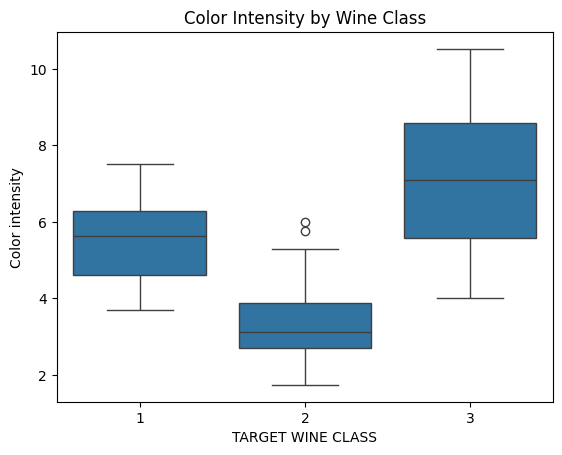

In [ ]:
# 색상 강도와 와인 클래스의 관계
sns.boxplot(x='TARGET WINE CLASS', y='Color intensity', data=data)
plt.title('Color Intensity by Wine Class')
plt.show()

In [ ]:
# 이상치를 제거하기 전의 데이터 행 수 확인
print("Original Data Rows:", len(data))

# 'Alcohol'의 이상치 범위와 대상 클래스를 설정
alcohol_lower_bound = 5.5
alcohol_upper_bound = 6.5
target_class = 2  # 대상 클래스 번호 설정

# 해당 클래스의 'Alcohol' 이상치 범위 안에 있는 행만 삭제
data = data[~((data['TARGET WINE CLASS'] == target_class) & (data['Color intensity'] >= alcohol_lower_bound) & (data['Color intensity'] <= alcohol_upper_bound))]

# 이상치를 제거한 후의 데이터 행 수 확인
print("Filtered Data Rows:", len(data))

Original Data Rows: 88
Filtered Data Rows: 86


## 와인에 존재하는 말산의 양(Malic acid)과 와인 클래스(TARGET WINE CLASS)의 관계 확인 및 이상치 제거

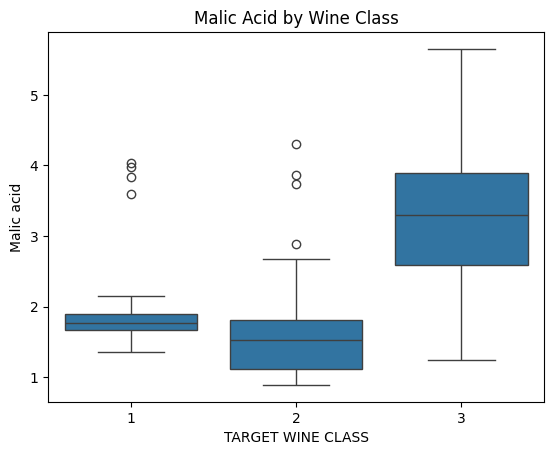

In [ ]:
#  와인에 존재하는 말산의 양. 과일의 산미와 와인 클래스의 관계
sns.boxplot(x='TARGET WINE CLASS', y='Malic acid', data=data)
plt.title('Malic Acid by Wine Class')
plt.show()

In [ ]:
# 이상치를 제거하기 전의 데이터 행 수 확인
print("Original Data Rows:", len(data))

# 'Alcohol'의 이상치 범위와 대상 클래스를 설정
alcohol_lower_bound = 3.0
alcohol_upper_bound = 4.5
target_class = 1  # 대상 클래스 번호 설정

# 해당 클래스의 'Alcohol' 이상치 범위 안에 있는 행만 삭제
data = data[~((data['TARGET WINE CLASS'] == target_class) & (data['Malic acid'] >= alcohol_lower_bound) & (data['Malic acid'] <= alcohol_upper_bound))]

# 이상치를 제거한 후의 데이터 행 수 확인
print("Filtered Data Rows:", len(data))

Original Data Rows: 86
Filtered Data Rows: 82


In [ ]:
# 이상치를 제거하기 전의 데이터 행 수 확인
print("Original Data Rows:", len(data))

# 'Alcohol'의 이상치 범위와 대상 클래스를 설정
alcohol_lower_bound = 3.0
alcohol_upper_bound = 5.0
target_class = 2  # 대상 클래스 번호 설정

# 해당 클래스의 'Alcohol' 이상치 범위 안에 있는 행만 삭제
data = data[~((data['TARGET WINE CLASS'] == target_class) & (data['Malic acid'] >= alcohol_lower_bound) & (data['Malic acid'] <= alcohol_upper_bound))]

# 이상치를 제거한 후의 데이터 행 수 확인
print("Filtered Data Rows:", len(data))

Original Data Rows: 82
Filtered Data Rows: 79


## 와인 샘플에 포함된 재의 양(Ash)과 와인 클래스(TARGET WINE CLASS)의 관계 확인 및 이상치 제거

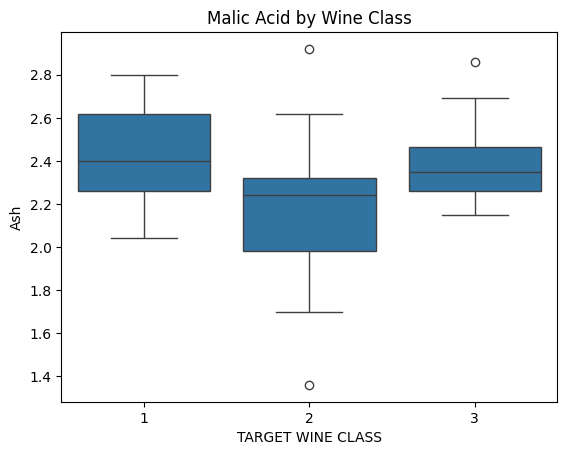

In [ ]:
# 와인 샘플에 포함된 재의 양, 와인의 미네랄 함량과 와인 클래스의 관계
sns.boxplot(x='TARGET WINE CLASS', y='Ash', data=data)
plt.title('Malic Acid by Wine Class')
plt.show()

## 재의 알칼리성 정도(Alcalinity of ash)과 와인 클래스(TARGET WINE CLASS)의 관계 확인 및 이상치 제거

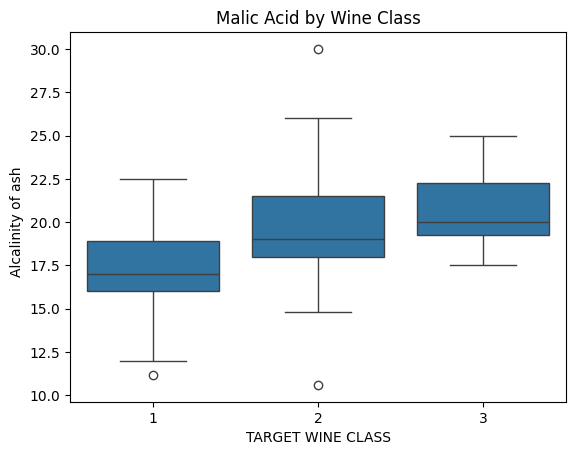

In [ ]:
# 재의 알칼리성 정도. 와인의 pH에 영향과 와인클래스의 영향
sns.boxplot(x='TARGET WINE CLASS', y='Alcalinity of ash  ', data=data)
plt.title('Malic Acid by Wine Class')
plt.show()

## 와인에 포함된 마그네슘의 양(Magnesium)과 와인 클래스(TARGET WINE CLASS)의 관계 확인 및 이상치 제거

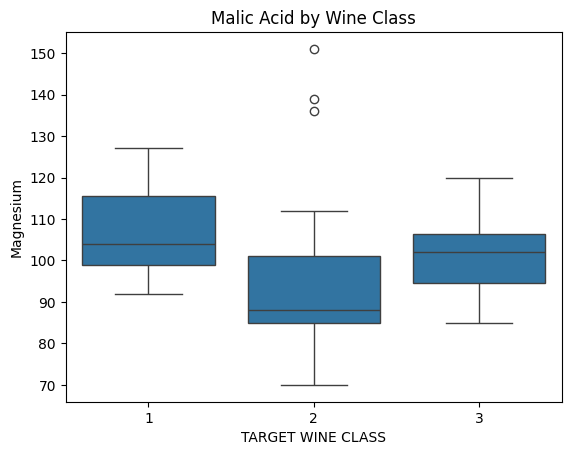

In [ ]:
sns.boxplot(x='TARGET WINE CLASS', y='Magnesium', data=data)
plt.title('Malic Acid by Wine Class')
plt.show()

In [ ]:
# 이상치를 제거하기 전의 데이터 행 수 확인
print("Original Data Rows:", len(data))

# 'Alcohol'의 이상치 범위와 대상 클래스를 설정
alcohol_lower_bound = 150
alcohol_upper_bound = 160
target_class = 2  # 대상 클래스 번호 설정

# 해당 클래스의 'Alcohol' 이상치 범위 안에 있는 행만 삭제
data = data[~((data['TARGET WINE CLASS'] == target_class) & (data['Magnesium'] >= alcohol_lower_bound) & (data['Magnesium'] <= alcohol_upper_bound))]

# 이상치를 제거한 후의 데이터 행 수 확인
print("Filtered Data Rows:", len(data))

Original Data Rows: 79
Filtered Data Rows: 78


## 페놀 화합물의 한 유형(Flavanoids)과 와인 클래스(TARGET WINE CLASS)의 관계 확인 및 이상치 제거

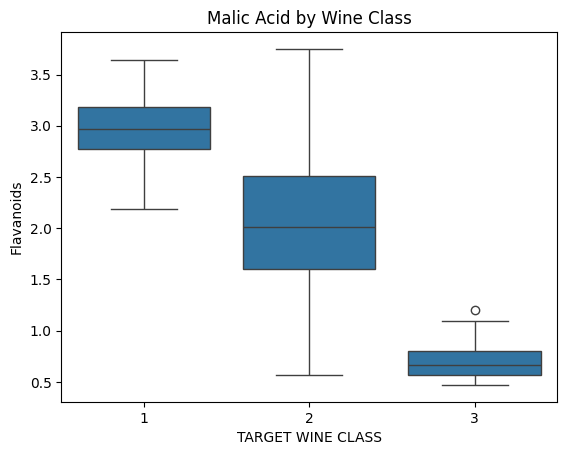

In [ ]:
# 페놀 화합물의 한 유형으로, 와인의 색상과 맛, 산화 방지 특성과 와인 클래스 관계
sns.boxplot(x='TARGET WINE CLASS', y='Flavanoids', data=data)
plt.title('Malic Acid by Wine Class')
plt.show()

In [ ]:
# 이상치를 제거하기 전의 데이터 행 수 확인
print("Original Data Rows:", len(data))

# 'Alcohol'의 이상치 범위와 대상 클래스를 설정
alcohol_lower_bound = 5
alcohol_upper_bound = 6
target_class = 2  # 대상 클래스 번호 설정

# 해당 클래스의 'Alcohol' 이상치 범위 안에 있는 행만 삭제
data = data[~((data['TARGET WINE CLASS'] == target_class) & (data['Flavanoids'] >= alcohol_lower_bound) & (data['Flavanoids'] <= alcohol_upper_bound))]

# 이상치를 제거한 후의 데이터 행 수 확인
print("Filtered Data Rows:", len(data))

Original Data Rows: 78
Filtered Data Rows: 78


## 플라바노이드가 아닌 다른 페놀 화합물(Nonflavanoid phenols)과 와인 클래스(TARGET WINE CLASS)의 관계 확인 및 이상치 제거

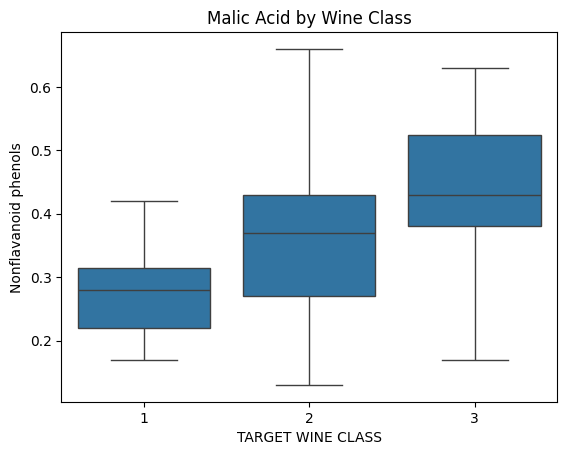

In [ ]:
# 플라바노이드가 아닌 다른 페놀 화합물과 와인클래스와의 관계
sns.boxplot(x='TARGET WINE CLASS', y='Nonflavanoid phenols', data=data)
plt.title('Malic Acid by Wine Class')
plt.show()

## Proanthocyanins과 와인 클래스(TARGET WINE CLASS)의 관계 확인 및 이상치 제거

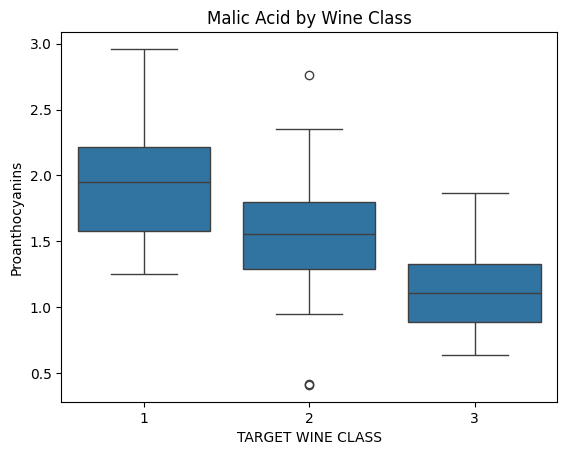

In [ ]:
# 항산화 성질을 가진 플라바노이드의 한 종류와 와인클래스와의 관계
sns.boxplot(x='TARGET WINE CLASS', y='Proanthocyanins', data=data)
plt.title('Malic Acid by Wine Class')
plt.show()

## 와인의 색조(Hue)과 와인 클래스(TARGET WINE CLASS)의 관계 확인 및 이상치 제거

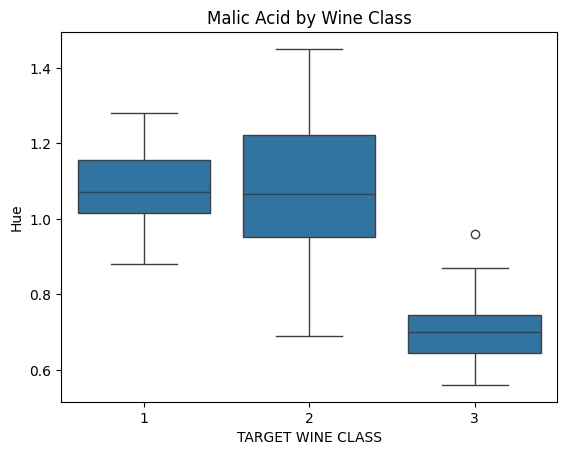

In [ ]:
# 와인의 색조와 와인클래스와의 관계
sns.boxplot(x='TARGET WINE CLASS', y='Hue', data=data)
plt.title('Malic Acid by Wine Class')
plt.show()

In [ ]:
# 이상치를 제거하기 전의 데이터 행 수 확인
print("Original Data Rows:", len(data))

# 'Alcohol'의 이상치 범위와 대상 클래스를 설정
alcohol_lower_bound = 0.91
alcohol_upper_bound = 1
target_class = 3  # 대상 클래스 번호 설정

# 해당 클래스의 'Alcohol' 이상치 범위 안에 있는 행만 삭제
data = data[~((data['TARGET WINE CLASS'] == target_class) & (data['Hue'] >= alcohol_lower_bound) & (data['Hue'] <= alcohol_upper_bound))]

# 이상치를 제거한 후의 데이터 행 수 확인
print("Filtered Data Rows:", len(data))

Original Data Rows: 78
Filtered Data Rows: 77


## 희석된 와인의 흡광도 비율(OD280/OD315 of diluted wines)과 와인 클래스(TARGET WINE CLASS)의 관계 확인 및 이상치 제거

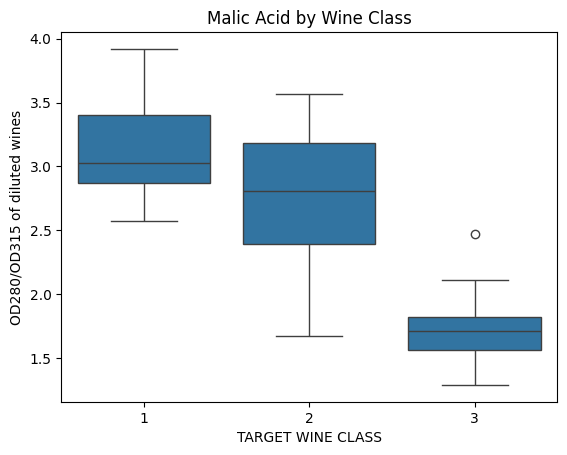

In [ ]:
# 희석된 와인의 흡광도 비율, 단백질 안정성와 와인클래스와의 관계
sns.boxplot(x='TARGET WINE CLASS', y='OD280/OD315 of diluted wines', data=data)
plt.title('Malic Acid by Wine Class')
plt.show()

In [ ]:
# 이상치를 제거하기 전의 데이터 행 수 확인
print("Original Data Rows:", len(data))

# 'Alcohol'의 이상치 범위와 대상 클래스를 설정
alcohol_lower_bound = 2.3
alcohol_upper_bound = 2.5
target_class = 3  # 대상 클래스 번호 설정

# 해당 클래스의 'Alcohol' 이상치 범위 안에 있는 행만 삭제
data = data[~((data['TARGET WINE CLASS'] == target_class) & (data['OD280/OD315 of diluted wines'] >= alcohol_lower_bound) & (data['OD280/OD315 of diluted wines'] <= alcohol_upper_bound))]

# 이상치를 제거한 후의 데이터 행 수 확인
print("Filtered Data Rows:", len(data))

Original Data Rows: 77
Filtered Data Rows: 76


## 이상치 제거 후 클래스 별 데이터 수 확인

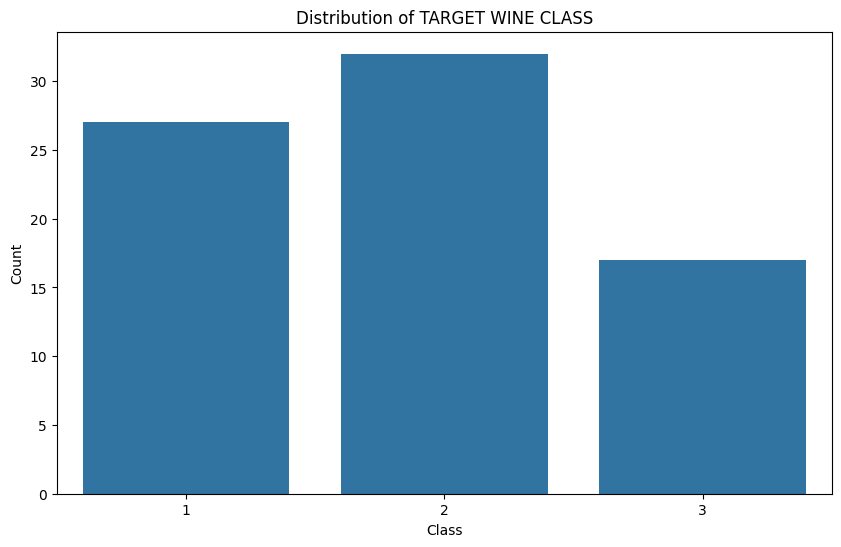

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TARGET WINE CLASS', data=data)
plt.title('Distribution of TARGET WINE CLASS')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## 변수 간 상관관계가 0.7이상인 변수쌍을 출력

---
다중공선성 방지 목적 -> 학습 할때 고려하기


In [5]:
# 'TARGET WINE CLASS' 열을 제외하고 상관관계 행렬 계산
features_data = data.drop('TARGET WINE CLASS', axis=1)
corr_matrix = features_data.corr().abs()  # 절대값을 취하여 음의 상관관계도 고려

# 상관계수가 0.7 이상인 열 쌍 찾기 (1인 자기 자신은 제외)
high_corr_var = [(column, index) for column in corr_matrix.columns for index in corr_matrix.index if (corr_matrix[column][index] > 0.7) & (column != index)]

# 고상관 열 쌍 출력
print("Highly correlated variable pairs (column, index) with correlation coefficient > 0.7:")
for var_pair in high_corr_var:
    print(var_pair)

Highly correlated variable pairs (column, index) with correlation coefficient > 0.7:
('Total phenols', 'Flavanoids')
('Flavanoids', 'Total phenols')
('Flavanoids', 'OD280/OD315 of diluted wines')
('OD280/OD315 of diluted wines', 'Flavanoids')


## 이상치 제거 후 최종 학습데이터 저장

In [ ]:
# 'data' 데이터프레임을 'Training_new.csv' 파일로 저장
data.to_csv('Training(최종).csv', index=False)

# 데이터 세팅 및 모델 학습

In [44]:
# 데이터 로드 및 전처리 함수
def preprocess_data(filepath, features, scaler=None):
    df = pd.read_csv(filepath)
    X = df[features]
    y = df['TARGET WINE CLASS']
    if scaler is None:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = scaler.transform(X)
    return X_scaled, y, scaler


# 학습할 피처 설정
# Malic acid, Flavanoids, Total phenols, Hue, Proanthocyanins 제거
features_to_use = ['Alcohol','Magnesium','Ash',
                   'Alcalinity of ash  ',
                   'Nonflavanoid phenols', 'Color intensity',
                    'OD280/OD315 of diluted wines']

# 학습 데이터 전처리
X_train, y_train, scaler = preprocess_data('./Training(최종).csv', features_to_use)

# 클래스 가중치 설정
# 클래스 불균형을 해소하기 위해 3 클래스에 가중치를 5부여
class_weights = {1: 1, 2: 1, 3: 5}

# 로지스틱 회귀 모델 초기화 및 클래스 가중치 적용
model = LogisticRegression(class_weight=class_weights, solver='liblinear', penalty='l2', C=0.1, max_iter=100)


# 모델 학습
model.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight={1: 1, 2: 1, 3: 5}, solver='liblinear')

## 학습 정확도와 검증 정확도가 비슷함을보고 과적합 방지했다고 판단

---
Training OA: 0.9736842105263158

Validation OA: 0.9736842105263158


In [45]:
# 검증 데이터 전처리
X_val, y_val, _ = preprocess_data('./Validation.csv', features_to_use, scaler)

# 검증 데이터에 대한 예측 및 정확도 계산
y_val_pred = model.predict(X_val)


# 학습 정확도
y_train_pred = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_train_pred)
print(f'Training OA: {accuracy_train}')

# 검증 데이터에 대한 예측 및 정확도 계산
accuracy_val = accuracy_score(y_val, y_val_pred)
print(f'Validation OA: {accuracy_val}')

Training OA: 0.9736842105263158
Validation OA: 0.9736842105263158


# TEST 데이터셋에 대한 평가지표 출력 및 혼동행렬

In [43]:
## TEST 정확도 결과
# 검증 데이터 전처리
X_test, y_test, _ = preprocess_data('TEST.csv', features_to_use, scaler)

# 검증 데이터에 대한 예측 및 정확도 계산
y_test_pred = model.predict(X_test)

# 테스트 데이터에 대한 예측 및 정확도 계산
accuracy_test = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='macro')
recall = recall_score(y_test, y_test_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_test_pred)

# 테스트 데이터에 대한 OA, Precision, Recall 및 오차 행렬 출력
print(f'TEST OA: {accuracy_test}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print('Confusion Matrix:')
print(conf_matrix)


TEST OA: 0.9148936170212766
Precision: 0.9138888888888889
Recall: 0.9206349206349206
Confusion Matrix:
[[13  1  0]
 [ 2 15  1]
 [ 0  0 15]]


# 모델 저장

In [ ]:
# 모델을 'model.joblib' 파일로 저장
dump(model, '5조_regression_model.joblib')


['5조_regression_model.joblib']

In [ ]:
# 'model.joblib' 파일에서 모델 불러오기
model = load('5조_regression_model.joblib')